In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os
import time
import statsmodels.tsa.arima.model as ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima.utils import ndiffs
plt.style.use(style = 'seaborn')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,15]

In [2]:
df = pd.read_csv(r'C:\Users\mayan\Downloads\RIO (2).csv')
df.shape

(2521, 9)

In [3]:
df.head()

,Code,Date,Open,High,Low,Close,Volume,Value,Trades
0,RIO,17/05/2013,55.20,55.52,54.71,55.29,2680560,1.480167e+08,18930
1,RIO,20/05/2013,55.66,56.04,55.15,55.42,2571427,1.433323e+08,16652
2,RIO,21/05/2013,55.40,55.61,54.68,55.30,2408558,1.331562e+08,17722
3,RIO,22/05/2013,56.35,56.69,56.06,56.30,2966034,1.695224e+08,12748
4,RIO,23/05/2013,56.15,56.40,54.95,55.10,3996941,2.220362e+08,19597


In [4]:
df['Average'] = (df['Open'] + df['High'] + df['Low'] + df['Close'])/4
df['Valptra'] = df['Value'] / df['Trades']
df.head()

,Code,Date,Open,High,Low,Close,Volume,Value,Trades,Average,Valptra
0,RIO,17/05/2013,55.20,55.52,54.71,55.29,2680560,1.480167e+08,18930,55.1800,7819.160726
1,RIO,20/05/2013,55.66,56.04,55.15,55.42,2571427,1.433323e+08,16652,55.5675,8607.513386
2,RIO,21/05/2013,55.40,55.61,54.68,55.30,2408558,1.331562e+08,17722,55.2475,7513.608685
3,RIO,22/05/2013,56.35,56.69,56.06,56.30,2966034,1.695224e+08,12748,56.3500,13297.960844
4,RIO,23/05/2013,56.15,56.40,54.95,55.10,3996941,2.220362e+08,19597,55.6500,11330.112956


In [5]:
dfc =df.corr()
dfc

,Open,High,Low,Close,Volume,Value,Trades,Average,Valptra
Open,1.000000,0.999632,0.999634,0.998228,-0.349935,0.213934,0.566090,0.999725,-0.309071
High,0.999632,1.000000,0.999583,0.998641,-0.346524,0.218116,0.571910,0.999817,-0.309809
Low,0.999634,0.999583,1.000000,0.998659,-0.354425,0.209180,0.560158,0.999820,-0.309344
Close,0.998228,0.998641,0.998659,1.000000,-0.352996,0.212206,0.565069,0.999232,-0.309681
Volume,-0.349935,-0.346524,-0.354425,-0.352996,1.000000,0.801059,0.169173,-0.351073,0.749702
Value,0.213934,0.218116,0.209180,0.212206,0.801059,1.000000,0.567608,0.213456,0.554571
Trades,0.566090,0.571910,0.560158,0.565069,0.169173,0.567608,1.000000,0.566035,-0.289289
Average,0.999725,0.999817,0.999820,0.999232,-0.351073,0.213456,0.566035,1.000000,-0.309527
Valptra,-0.309071,-0.309809,-0.309344,-0.309681,0.749702,0.554571,-0.289289,-0.309527,1.000000


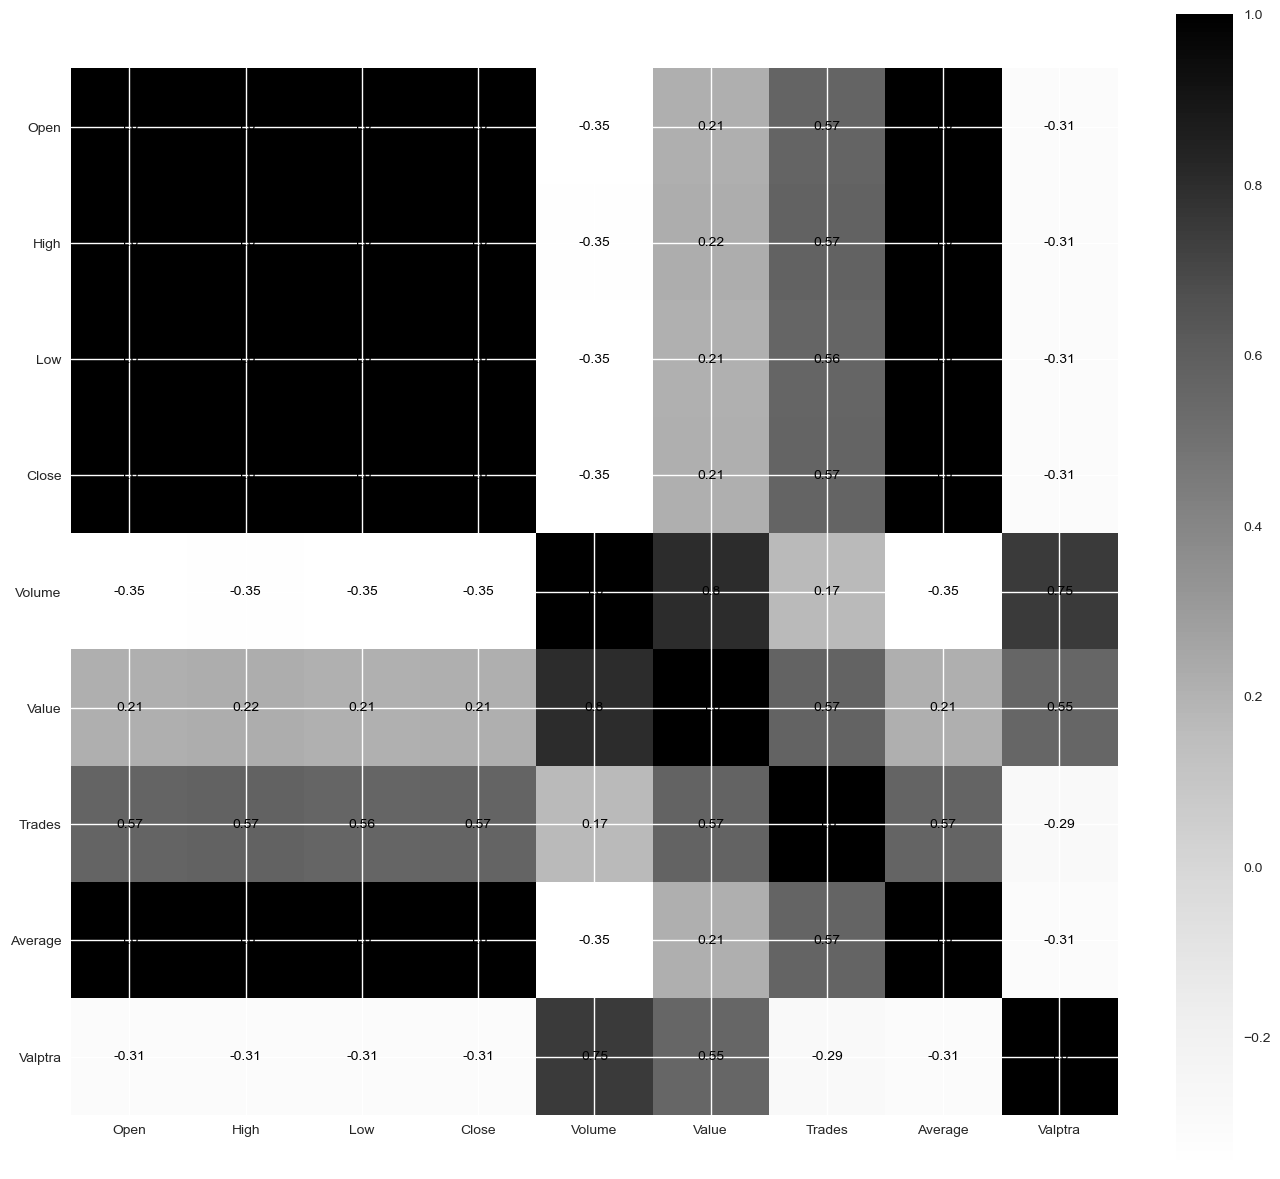

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(dfc, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

ax.set_xticks(np.arange(len(dfc)), labels = dfc.columns)
ax.set_yticks(np.arange(len(dfc)), labels = dfc.columns)
for i in range(len(dfc.columns)):
    for j in range(len(dfc.columns)):
        text = ax.text(j, i, round(dfc.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black")

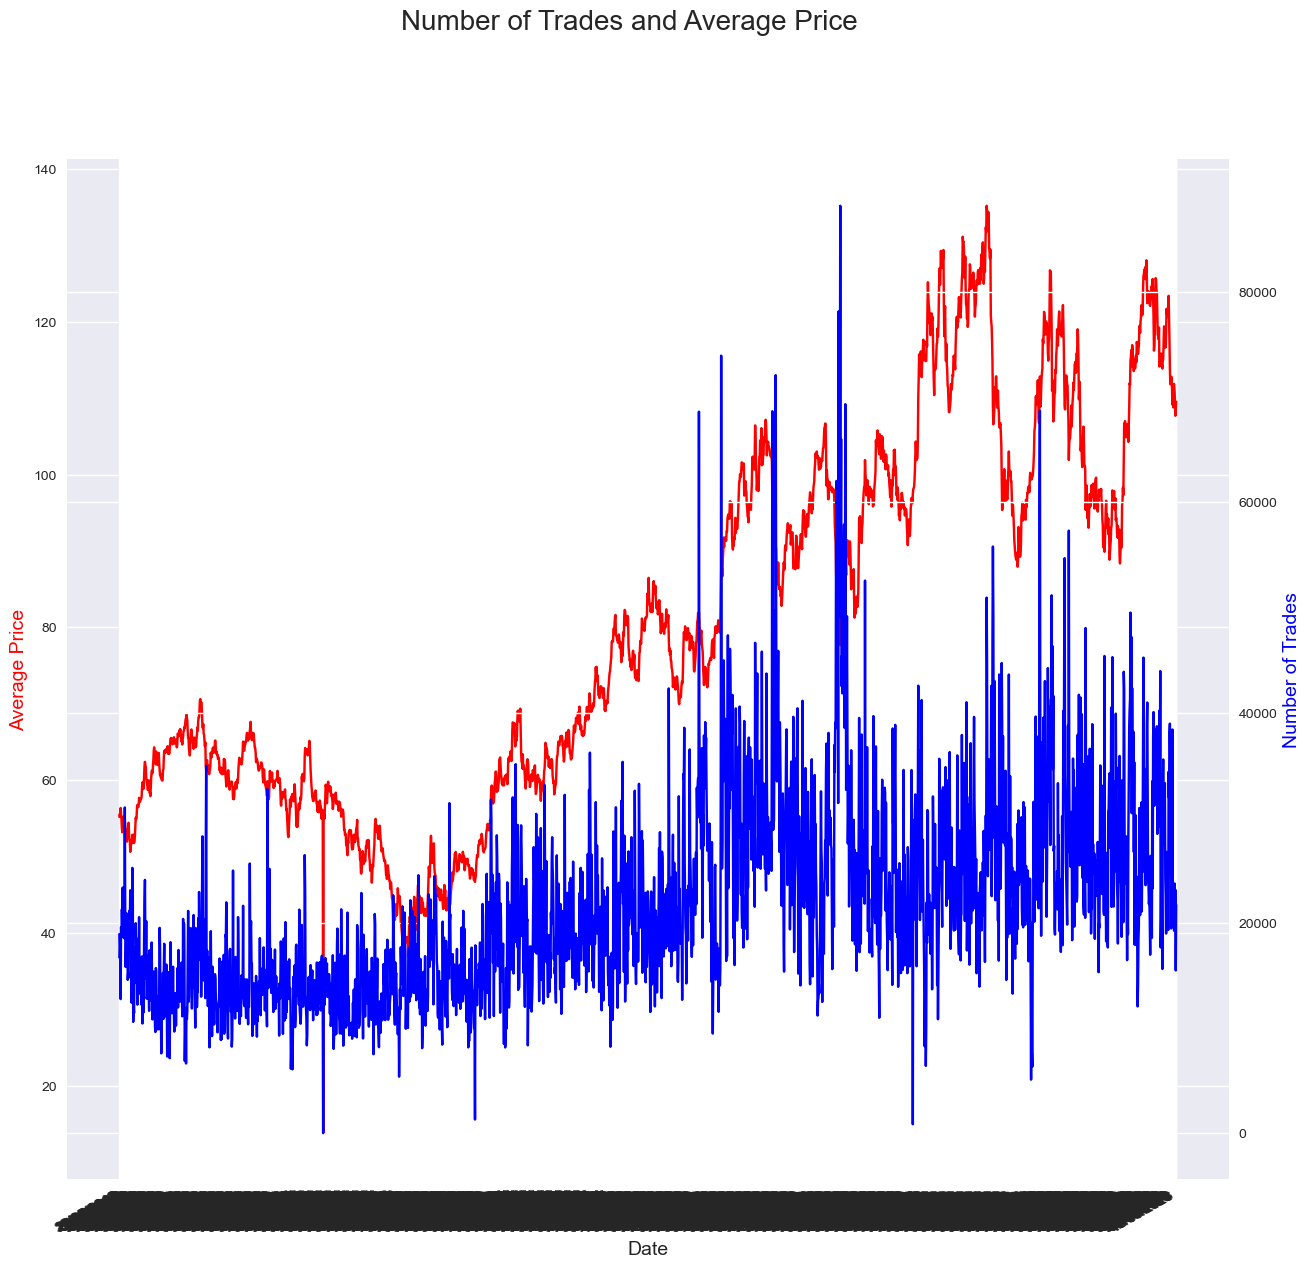

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df['Date'], df['Average'], color = 'red')
ax2.plot(df['Date'], df['Trades'], color = 'blue')
ax1.set_xlabel("Date", fontsize=14)
ax1.set_ylabel("Average Price", color='red', fontsize=14)
ax2.set_ylabel("Number of Trades", color='Blue', fontsize=14)
fig.suptitle("Number of Trades and Average Price", fontsize=20)
fig.autofmt_xdate()

In [8]:
df = df[['Average']].copy()
df

,Average
0,55.1800
1,55.5675
2,55.2475
3,56.3500
4,55.6500
...,...
2516,111.0925
2517,109.7750
2518,107.7225
2519,108.8975


<AxesSubplot:>

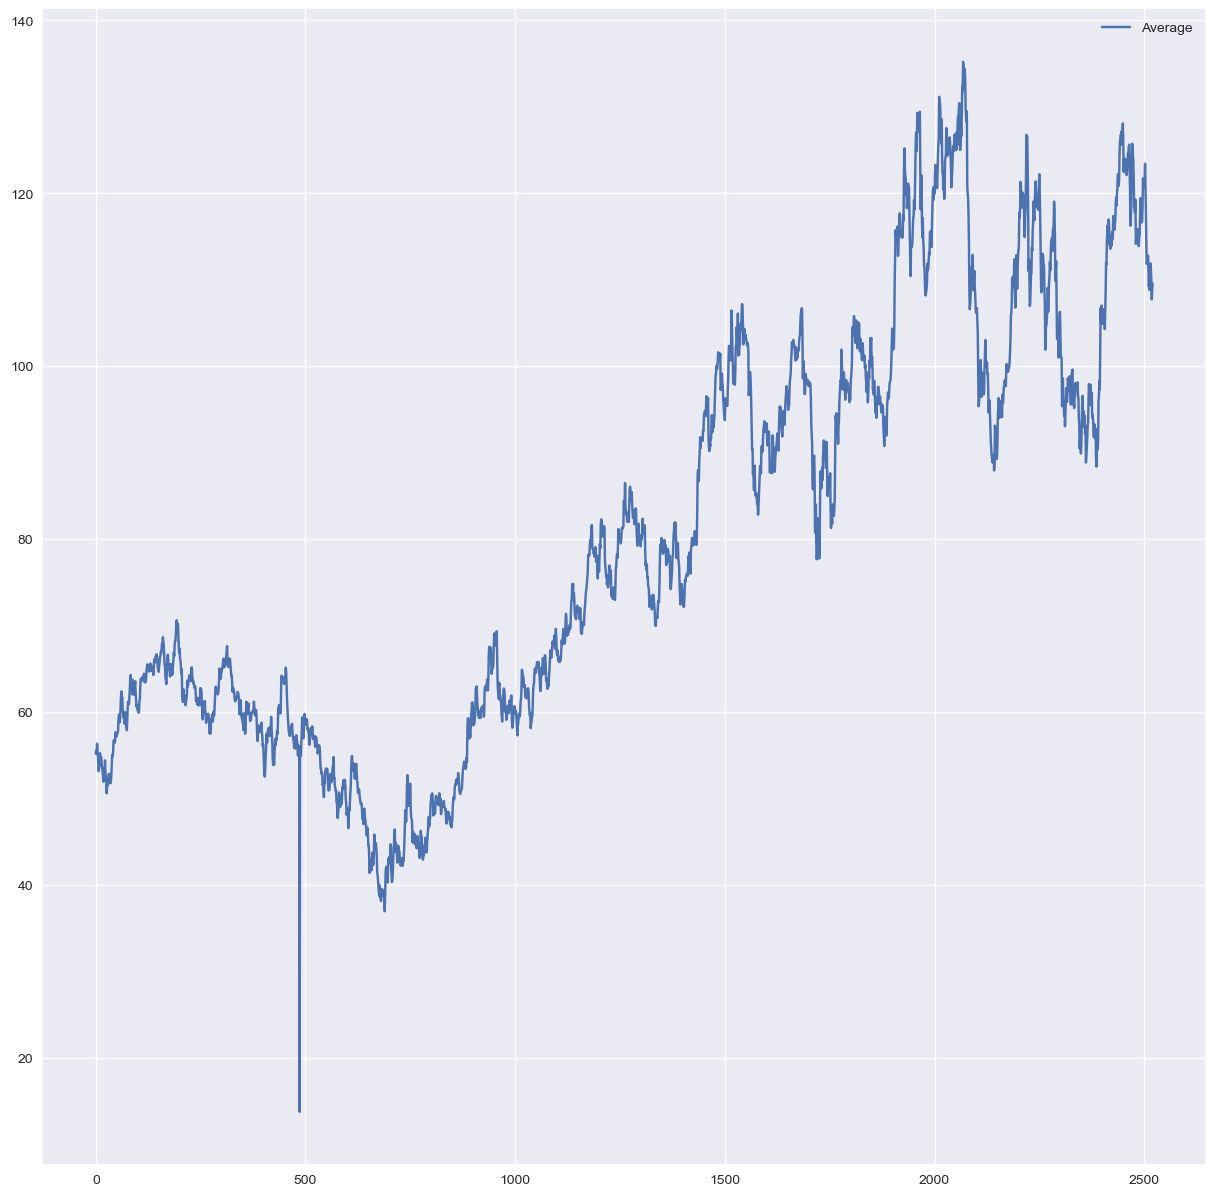

In [9]:
df.plot()

In [10]:
y = adfuller(df)
print(f'Statstic {y[0]}')
print(f'pvalue {y[1]}')

Statstic -1.4520573093250198
pvalue 0.5570807207085336


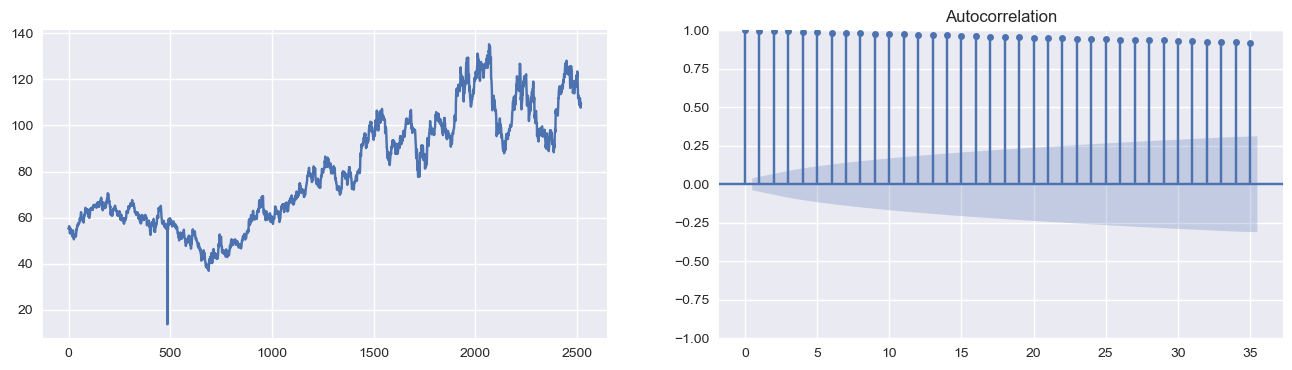

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax1. plot(df.Average)
plot_acf(df.Average, ax= ax2);

In [12]:
df.Average

0        55.1800
1        55.5675
2        55.2475
3        56.3500
4        55.6500
          ...   
2516    111.0925
2517    109.7750
2518    107.7225
2519    108.8975
2520    109.5500
Name: Average, Length: 2521, dtype: float64

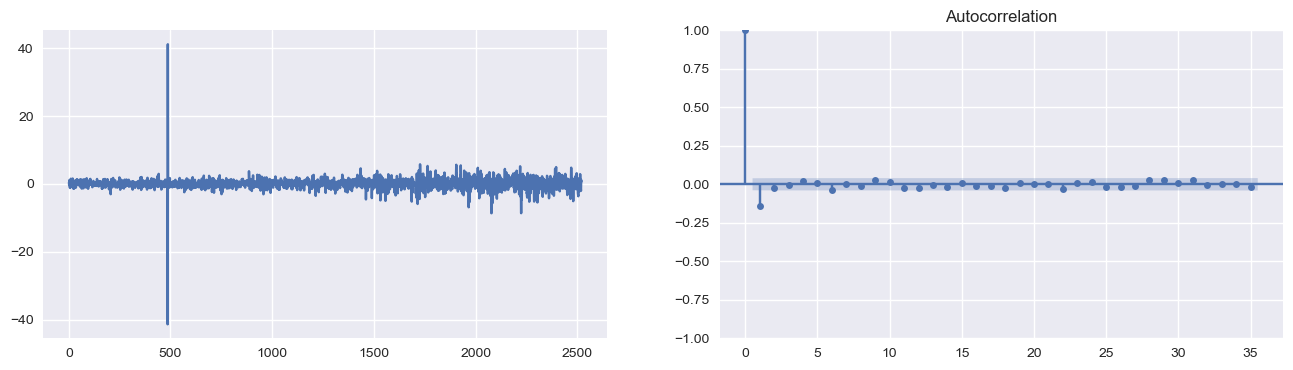

In [13]:
diff = df.Average.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax1. plot(diff)
plot_acf(diff, ax= ax2);

In [14]:
ndiffs(df.Average, test = 'adf')

1

C:\Users\mayan\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


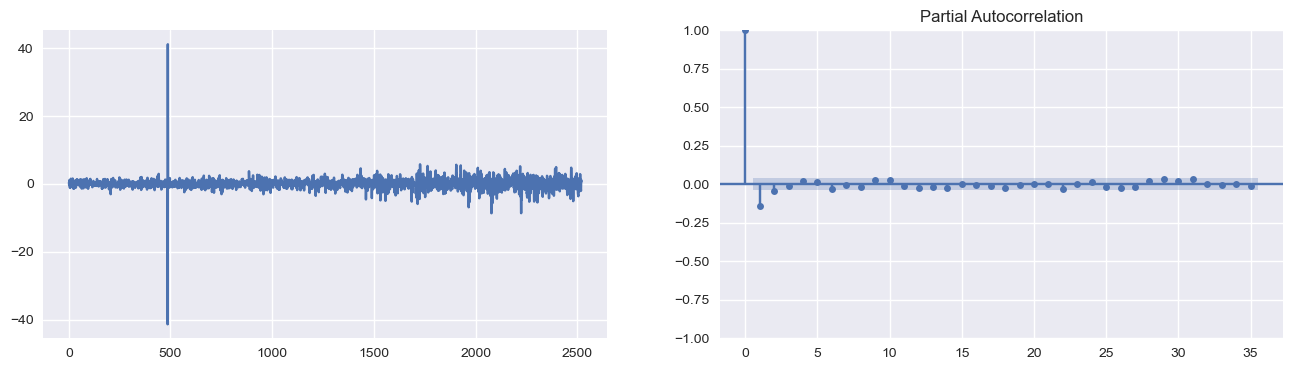

In [15]:
diff = df.Average.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax1. plot(diff)
plot_pacf(diff, ax= ax2);

p = 6 d = 1 q = 6

In [16]:
n = int(len(df)*0.65)
train = df.Average[:n]
test = df.Average[n:]

In [17]:
len(test)

883

In [18]:
model = sm.tsa.arima.ARIMA(train, order = (1,1,1))
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Average   No. Observations:                 1638
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3139.866
Date:                Wed, 17 May 2023   AIC                           6285.732
Time:                        10:14:20   BIC                           6301.934
Sample:                             0   HQIC                          6291.741
                               - 1638                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0794      0.022      3.659      0.000       0.037       0.122
ma.L1         -0.4142      0.022    -18.896      0.000      -0.457      -0.371
sigma2         2.7133      0.008    323.642      0.000       2.697       2.730
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           5922310.76
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                            -7.10
Prob(H) (two-sided):                  0.00   Kurtosis:                       297.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

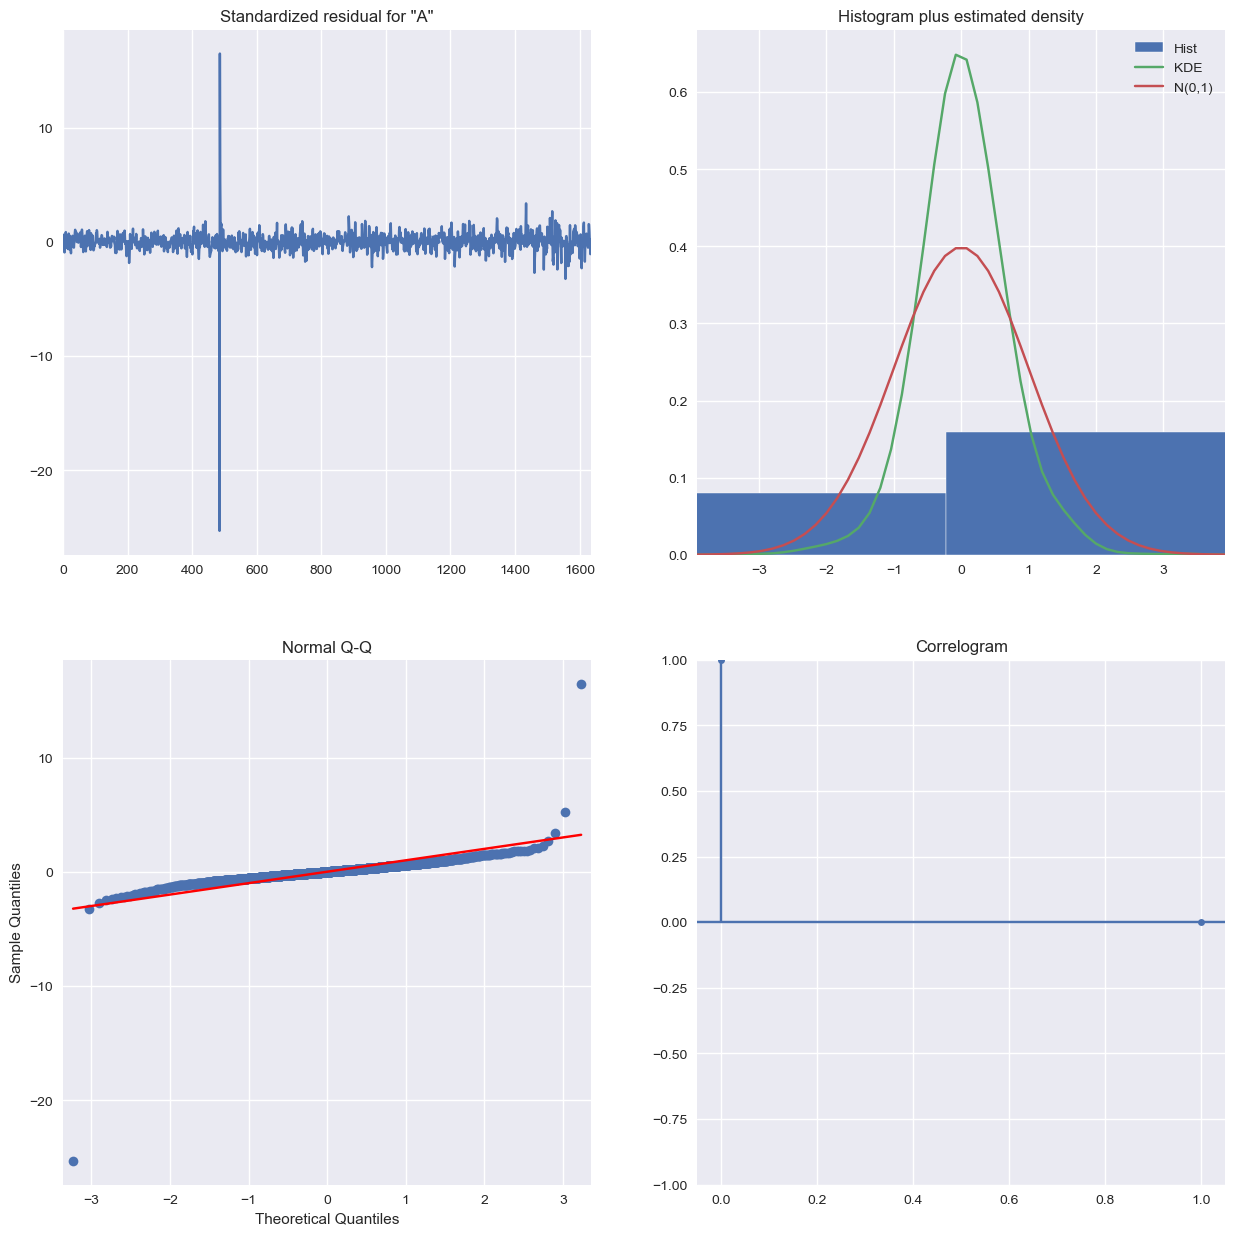

In [19]:
fig = plt.figure()
fig = result.plot_diagnostics(lags=1, fig=fig)


In [20]:
step = len(test)
p = result.predict(1)
p = p[0:len(test)]
p.index = test[:step].index
r = result.get_prediction(start =1, end = len(test))
rc = r.conf_int(method='endpoint', alpha=0.05)
rc.index = test[:step].index
rc['test'] = test
rc['pre'] = p
rc['diff'] = rc['test']-rc['pre']
rc['pdiff'] = ((rc['test']-rc['pre'])/rc['test'])*100
rc['corpre'] = rc['pre'] + rc['diff'].mean()
rc

,lower Average,upper Average,test,pre,diff,pdiff,corpre
1638,51.774227,58.585676,92.9250,55.179951,37.745049,40.618831,106.331139
1639,52.197589,58.710416,94.2975,55.454003,38.843497,41.192500,106.605190
1640,52.072991,58.539364,94.8525,55.306177,39.546323,41.692441,106.457365
1641,52.777136,59.235666,94.4750,56.006401,38.468599,40.718284,107.157588
1642,52.513405,58.970592,93.2225,55.741999,37.480501,40.205424,106.893186
...,...,...,...,...,...,...,...
2516,50.777677,57.234587,111.0925,54.006132,57.086368,51.386338,105.157319
2517,50.849503,57.306412,109.7750,54.077958,55.697042,50.737456,105.229145
2518,50.780689,57.237598,107.7225,54.009143,53.713357,49.862709,105.160331
2519,50.422527,56.879436,108.8975,53.650982,55.246518,50.732587,104.802169


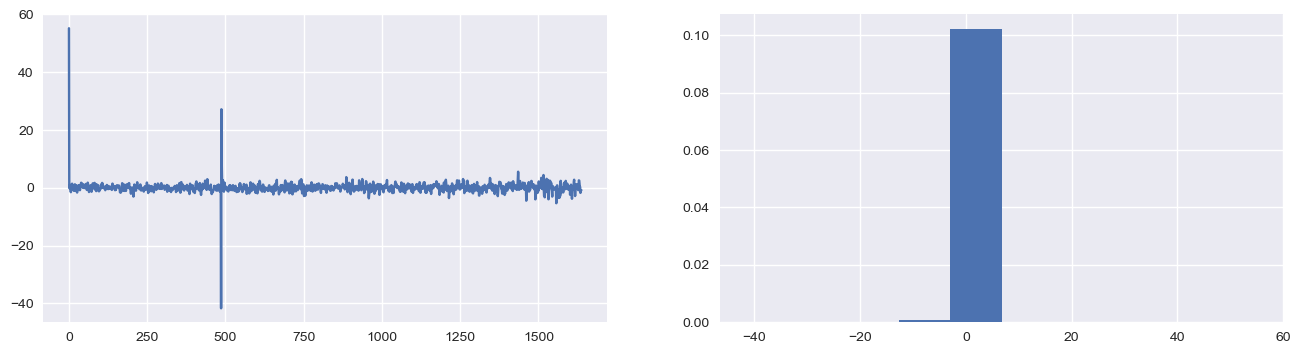

In [21]:
residuals = pd.DataFrame(result.resid)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals, density = True);

In [22]:
rc.head()

,lower Average,upper Average,test,pre,diff,pdiff,corpre
1638,51.774227,58.585676,92.9250,55.179951,37.745049,40.618831,106.331139
1639,52.197589,58.710416,94.2975,55.454003,38.843497,41.192500,106.605190
1640,52.072991,58.539364,94.8525,55.306177,39.546323,41.692441,106.457365
1641,52.777136,59.235666,94.4750,56.006401,38.468599,40.718284,107.157588
1642,52.513405,58.970592,93.2225,55.741999,37.480501,40.205424,106.893186


Text(0.5, 0.98, 'Number of Trades and Average Price')

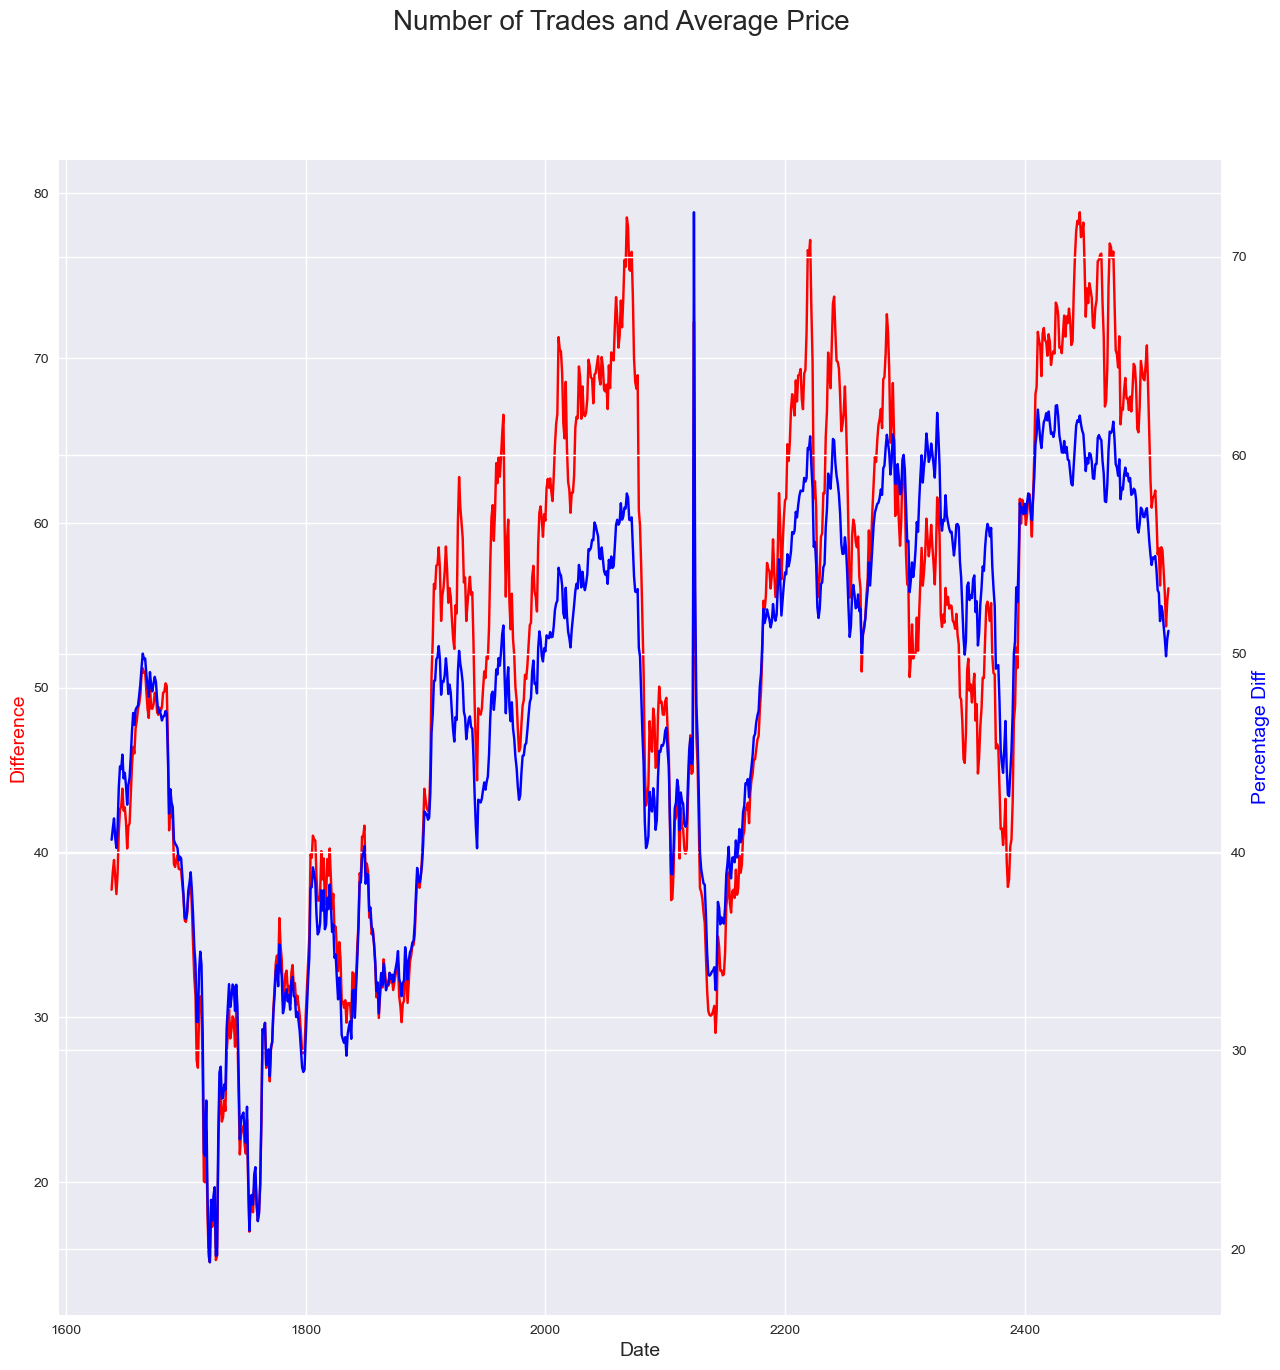

In [23]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(rc.index, rc['diff'], color = 'red')
ax2.plot(rc.index, rc['pdiff'], color = 'blue')
ax1.set_xlabel("Date", fontsize=14)
ax1.set_ylabel("Difference", color='red', fontsize=14)
ax2.set_ylabel("Percentage Diff", color='Blue', fontsize=14)
fig.suptitle("Number of Trades and Average Price", fontsize=20)

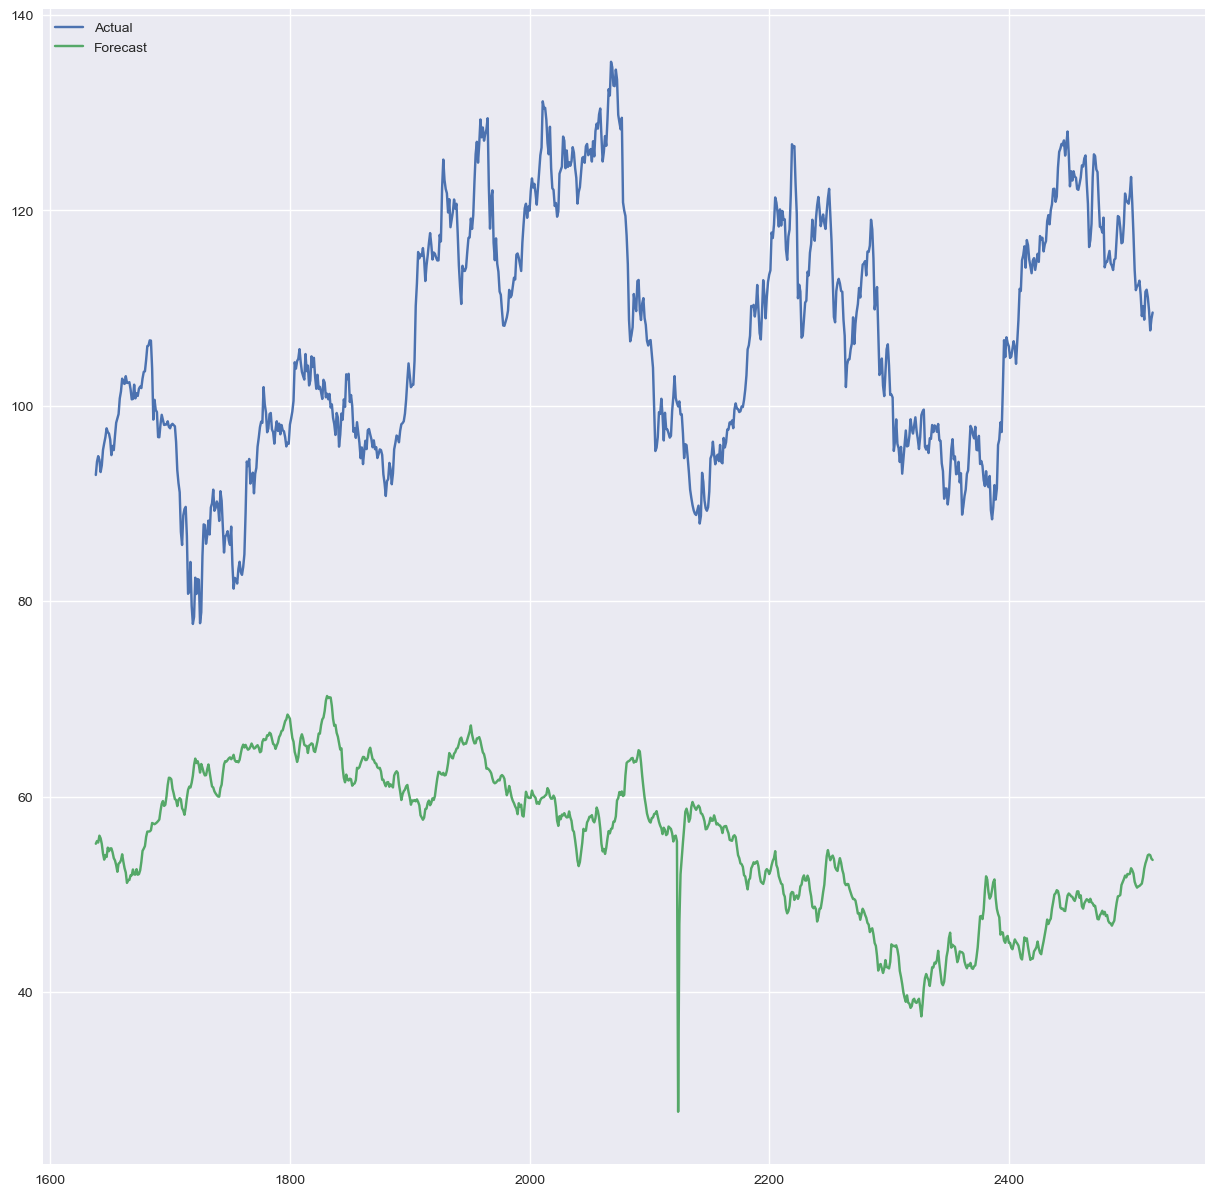

In [25]:
plt.figure()
plt.plot(test, label = 'Actual')
plt.plot(rc['pre'], label = 'Forecast')
plt.legend(loc ='upper left')